<a href="https://colab.research.google.com/github/ramakrishnabhavana/Bhavana-sML/blob/main/ML_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week-1

In [ ]:
import pandas as pd
data = {
    2014: [100.5, 150.8, 200.9, 30000, 40000],
    2015: [12000, 18000, 22000, 30000, 45000],
    2016: [20000, 50000, 70000, 100000, 125000],
    2017: [50000, 60000, 70000, 80000, 90000]
}
index = ['Madhu', 'Kusum', 'Kinshuk', 'Ankit', 'Shruti']
Sales = pd.DataFrame(data, index=index)
print(Sales)

            2014   2015    2016   2017
Madhu      100.5  12000   20000  50000
Kusum      150.8  18000   50000  60000
Kinshuk    200.9  22000   70000  70000
Ankit    30000.0  30000  100000  80000
Shruti   40000.0  45000  125000  90000


In [ ]:
# a) Display the row labels of Sales
print("a) Row Labels:")
print(Sales.index)

# b) Display the column labels of Sales
print("\nb) Column Labels:")
print(Sales.columns)

# c) Display the data types of each column of Sales
print("\nc) Data Types:")
print(Sales.dtypes)

# d) Display the dimensions, shape, size and values of Sales
print("\nd) DataFrame Properties:")
print("Dimensions:", Sales.ndim)
print("Shape:", Sales.shape)
print("Size:", Sales.size)
print("Values:\n", Sales.values)

# e) Display the last two rows of Sales
print("\ne) Last Two Rows:")
print(Sales.tail(2))

# f) Display the first two columns of Sales
print("\nf) First Two Columns:")
print(Sales.iloc[:, :2])


a) Row Labels:
Index(['Madhu', 'Kusum', 'Kinshuk', 'Ankit', 'Shruti'], dtype='object')

b) Column Labels:
Index([2014, 2015, 2016, 2017], dtype='int64')

c) Data Types:
2014    float64
2015      int64
2016      int64
2017      int64
dtype: object

d) DataFrame Properties:
Dimensions: 2
Shape: (5, 4)
Size: 20
Values:
 [[1.005e+02 1.200e+04 2.000e+04 5.000e+04]
 [1.508e+02 1.800e+04 5.000e+04 6.000e+04]
 [2.009e+02 2.200e+04 7.000e+04 7.000e+04]
 [3.000e+04 3.000e+04 1.000e+05 8.000e+04]
 [4.000e+04 4.500e+04 1.250e+05 9.000e+04]]

e) Last Two Rows:
           2014   2015    2016   2017
Ankit   30000.0  30000  100000  80000
Shruti  40000.0  45000  125000  90000

f) First Two Columns:
            2014   2015
Madhu      100.5  12000
Kusum      150.8  18000
Kinshuk    200.9  22000
Ankit    30000.0  30000
Shruti   40000.0  45000


In [ ]:
import pandas as pd
data_2018 = {
    'Madhu': 160000,
    'Kusum': 110000,
    'Kinshuk': 500000,
    'Ankit': 340000,
    'Shruti': 900000
}

# Convert the dictionary to a DataFrame
Sales2 = pd.DataFrame.from_dict(data_2018, orient='index', columns=[2018])
# Display the DataFrame
print("g) Sales2 DataFrame:")
print(Sales2)
#h Check if Sales2 is empty or it contains data.
print(Sales2.empty)

g) Sales2 DataFrame:
           2018
Madhu    160000
Kusum    110000
Kinshuk  500000
Ankit    340000
Shruti   900000
False


In [ ]:
import pandas as pd

# Q9: Original Sales DataFrame
Sales = pd.DataFrame({
    2014: [100.5, 150.8, 200.9, 30000, 40000],
    2015: [12000, 18000, 22000, 30000, 45000],
    2016: [20000, 50000, 70000, 100000, 125000],
    2017: [50000, 60000, 70000, 80000, 90000]
}, index=['Madhu', 'Kusum', 'Kinshuk', 'Ankit', 'Shruti'])

# Q10g: Create Sales2
Sales2 = pd.DataFrame.from_dict({
    'Madhu': 160000,
    'Kusum': 110000,
    'Kinshuk': 500000,
    'Ankit': 340000,
    'Shruti': 900000
}, orient='index', columns=[2018])

# a) Append Sales2 to Sales
Sales = pd.concat([Sales, Sales2], axis=1)
print("a) After appending Sales2:\n", Sales)

# b) Transpose Sales
Sales = Sales.T
print("\nb) Transposed Sales:\n", Sales)

# c) Sales in 2017 (from transposed DataFrame)
print("\nc) Sales in 2017:\n", Sales.loc[2017])

# d) Sales by Madhu and Ankit in 2017 and 2018
print("\nd) Madhu and Ankit sales in 2017 and 2018:\n", Sales.loc[[2017, 2018], ['Madhu', 'Ankit']])

# e) Sales by Shruti in 2016
print("\ne) Shruti sales in 2016:\n", Sales.loc[2016, 'Shruti'])

# f) Add Sumeet with sales for 2014–2018
Sales['Sumeet'] = [196.2, 37800, 52000, 78438, 38852]
print("\nf) Added Sumeet:\n", Sales)

# g) Delete data for 2014
Sales = Sales.drop(index=2014)
print("\ng) Deleted 2014:\n", Sales)

# h) Delete data for Kinshuk
Sales = Sales.drop(columns='Kinshuk')
print("\nh) Deleted Kinshuk:\n", Sales)

# i) Rename Ankit to Vivaan and Madhu to Shailesh
Sales = Sales.rename(columns={'Ankit': 'Vivaan', 'Madhu': 'Shailesh'})
print("\ni) Renamed Ankit and Madhu:\n", Sales)

# j) Update Shailesh's sale in 2018 to 100000
Sales.loc[2018, 'Shailesh'] = 100000
print("\nj) Updated Shailesh's 2018 sale:\n", Sales)

# k) Write to CSV without row or column labels
Sales.to_csv('SalesFigures.csv', index=False, header=False)

# l) Read from CSV and update labels
SalesRetrieved = pd.read_csv('SalesFigures.csv', header=None)
SalesRetrieved.index = Sales.index
SalesRetrieved.columns = Sales.columns
print("\nl) SalesRetrieved with updated labels:\n", SalesRetrieved)


a) After appending Sales2:
             2014   2015    2016   2017    2018
Madhu      100.5  12000   20000  50000  160000
Kusum      150.8  18000   50000  60000  110000
Kinshuk    200.9  22000   70000  70000  500000
Ankit    30000.0  30000  100000  80000  340000
Shruti   40000.0  45000  125000  90000  900000

b) Transposed Sales:
          Madhu     Kusum   Kinshuk     Ankit    Shruti
2014     100.5     150.8     200.9   30000.0   40000.0
2015   12000.0   18000.0   22000.0   30000.0   45000.0
2016   20000.0   50000.0   70000.0  100000.0  125000.0
2017   50000.0   60000.0   70000.0   80000.0   90000.0
2018  160000.0  110000.0  500000.0  340000.0  900000.0

c) Sales in 2017:
 Madhu      50000.0
Kusum      60000.0
Kinshuk    70000.0
Ankit      80000.0
Shruti     90000.0
Name: 2017, dtype: float64

d) Madhu and Ankit sales in 2017 and 2018:
          Madhu     Ankit
2017   50000.0   80000.0
2018  160000.0  340000.0

e) Shruti sales in 2016:
 125000.0

f) Added Sumeet:
          Madhu     K

In [ ]:
!pip install mysql-connector-python sqlalchemy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 54.6 MB/s eta 0:00:00


In [ ]:
!pip install pymysql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.6 MB/s eta 0:00:00


In [ ]:
!pip install pymysql sqlalchemy


**week** **2**

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Iris.csv')
df.head()

Saving Iris.csv to Iris.csv


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
df = pd.read_csv('Iris.csv')
print(df.shape)
print("Null values in the data set are",[col for col in df.columns if df[col].isnull().sum() > 0])
x_train,x_test,y_train,y_test = train_test_split(df.drop(labels=['Species'],axis=1 ),df['Species'],test_size=0.3,random_state=0)
constant_features = [features for features in x_train.columns if x_train[features].std() == 0]
print("There are ",len(constant_features),"constant features")
#constant_features = [col for col in df.columns if df[col].nunique() == 1]
#print("Constant features:", constant_features)
quasi_const_feat = []
for feature in x_train.columns:
  predominant = (x_train[feature].value_counts()/float (len(x_train))) .sort_values(ascending=False).values[0]
  if predominant > 0.999:
    quasi_const_feat.append(feature)
print("There are ",len(quasi_const_feat)," quasi constant features")
duplicated = []
for i in range(0,len(x_train.columns)):
  col_1 = x_train.columns[i]
  for col_2 in x_train.columns[i+1:]:
    if x_train[col_1].equals (x_train[col_2]):
      duplicated.append(col_2)
duplicated_features = set(duplicated)
print("There are",len(duplicated_features),"duplicated features")
x_train.drop(labels=quasi_const_feat,axis=1,inplace=True)
x_test.drop(labels=quasi_const_feat,axis=1,inplace=True)
print("x taining data is",x_train.shape,"x test data is",x_test.shape)

(150, 6)
Null values in the data set are []
There are  0 constant features
There are  0  quasi constant features
There are 0 duplicated features
x taining data is (105, 5) x test data is (45, 5)


In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('/Breast_cancer_dataset.csv')
print(df.shape)

# Drop useless column
if 'Unnamed: 32' in df.columns:
    df.drop('Unnamed: 32', axis=1, inplace=True)

# Check for null values
print("Null values in the dataset:", [col for col in df.columns if df[col].isnull().sum() > 0])

# Drop ID column if it exists
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

# Target and Features
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Constant features
constant_features = [feature for feature in x_train.select_dtypes(include=[np.number]).columns
                     if x_train[feature].std() == 0]
print("There are", len(constant_features), "constant features")

# Quasi-constant features
quasi_const_feat = []
for feature in x_train.columns:
    value_counts = x_train[feature].value_counts()
    if len(value_counts) == 0:
        continue  # Skip empty column
    predominant = (value_counts / float(len(x_train))).sort_values(ascending=False).values[0]
    if predominant > 0.999:
        quasi_const_feat.append(feature)
print("There are", len(quasi_const_feat), "quasi-constant features")

# Duplicated features
duplicated = []
for i in range(len(x_train.columns)):
    col_1 = x_train.columns[i]
    for col_2 in x_train.columns[i+1:]:
        if x_train[col_1].equals(x_train[col_2]):
            duplicated.append(col_2)

duplicated_features = set(duplicated)
print("There are", len(duplicated_features), "duplicated features")

# Drop quasi-constant features
x_train = x_train.drop(labels=quasi_const_feat, axis=1)
x_test = x_test.drop(labels=quasi_const_feat, axis=1)

print("x training data is", x_train.shape, "x test data is", x_test.shape)


(569, 33)
Null values in the dataset: []
There are 0 constant features
There are 0 quasi-constant features
There are 0 duplicated features
x training data is (398, 30) x test data is (171, 30)


                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


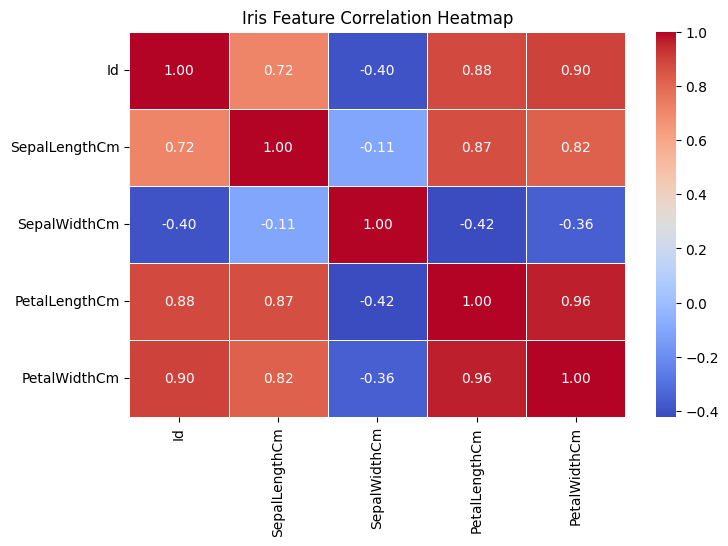

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Iris.csv')
df_numeric = df.select_dtypes(include='number')
correlation_matrix = df_numeric.corr()
print(correlation_matrix)

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Iris Feature Correlation Heatmap')
plt.show()


10


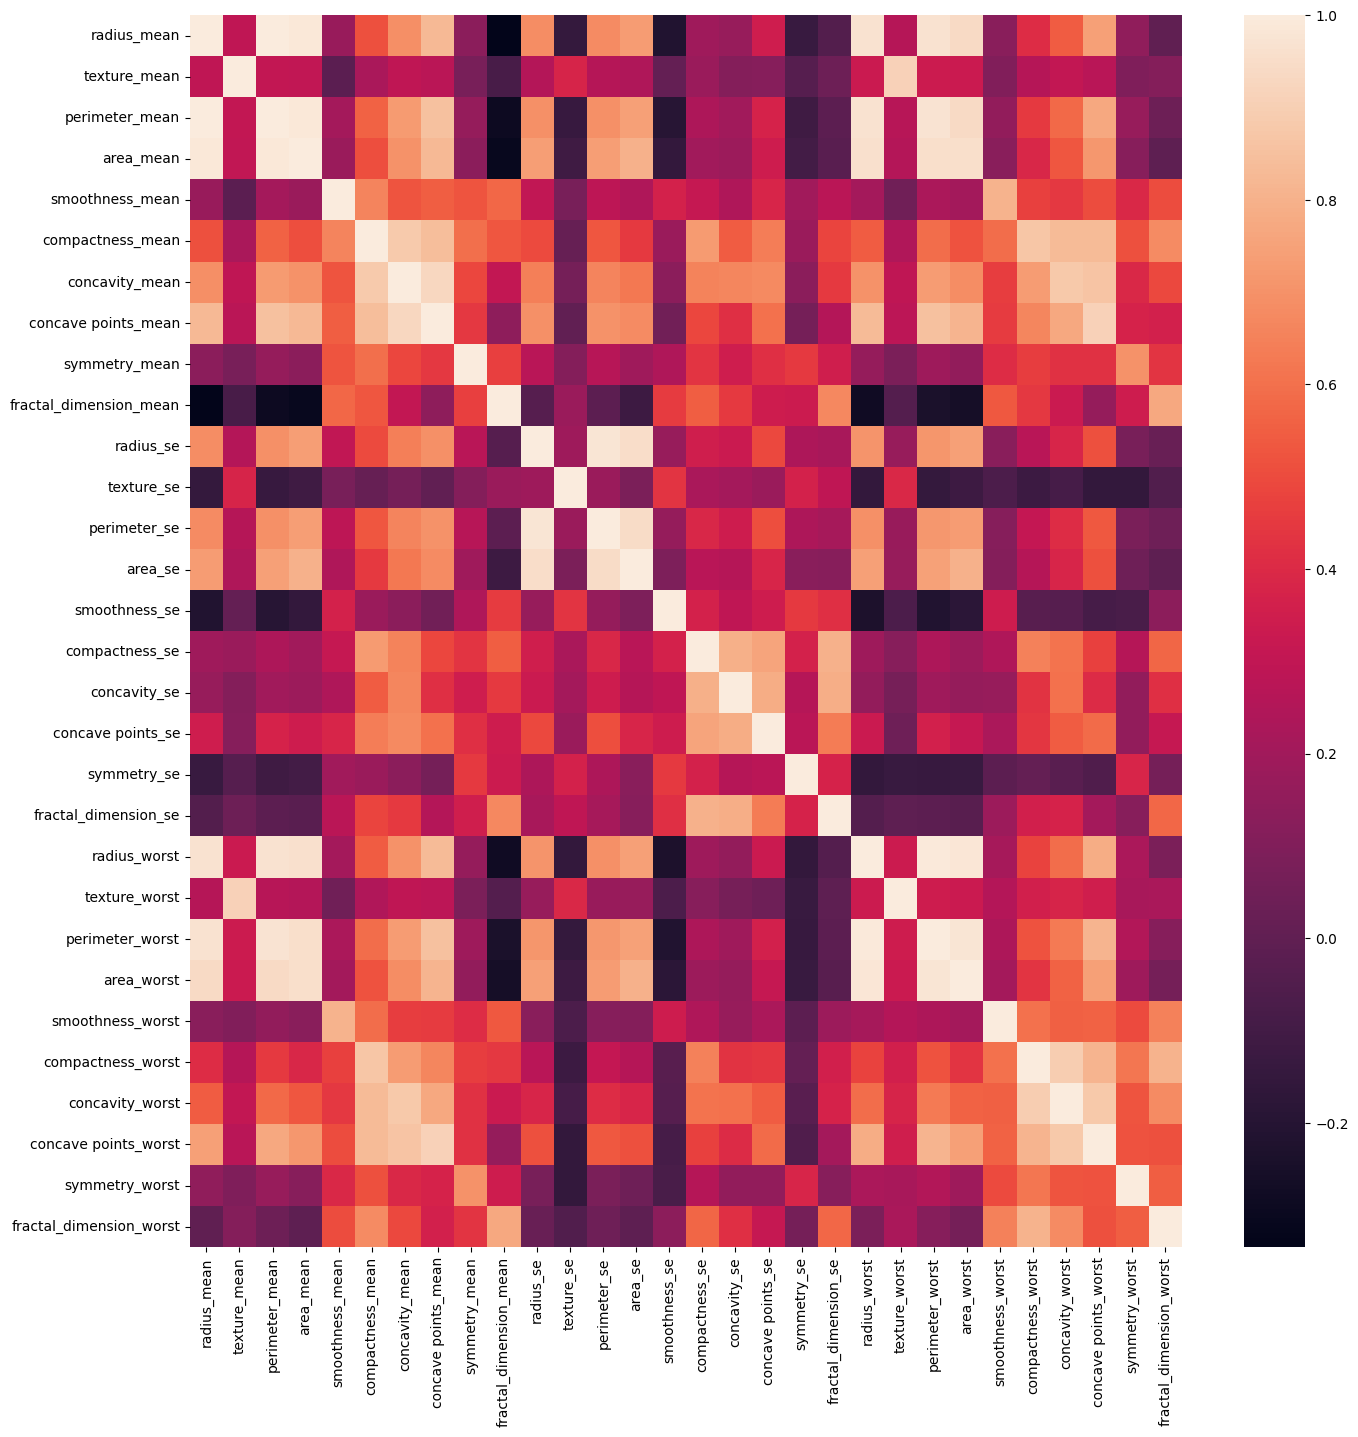

In [ ]:
#iris
corrmat = x_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(16,16)
sns.heatmap(corrmat)
grouped_feature_ls = []
correlated_groups = []
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr
corr_features = correlation(x_train,0.9)
correlated_features = set(corr_features)
print(len(correlated_features))

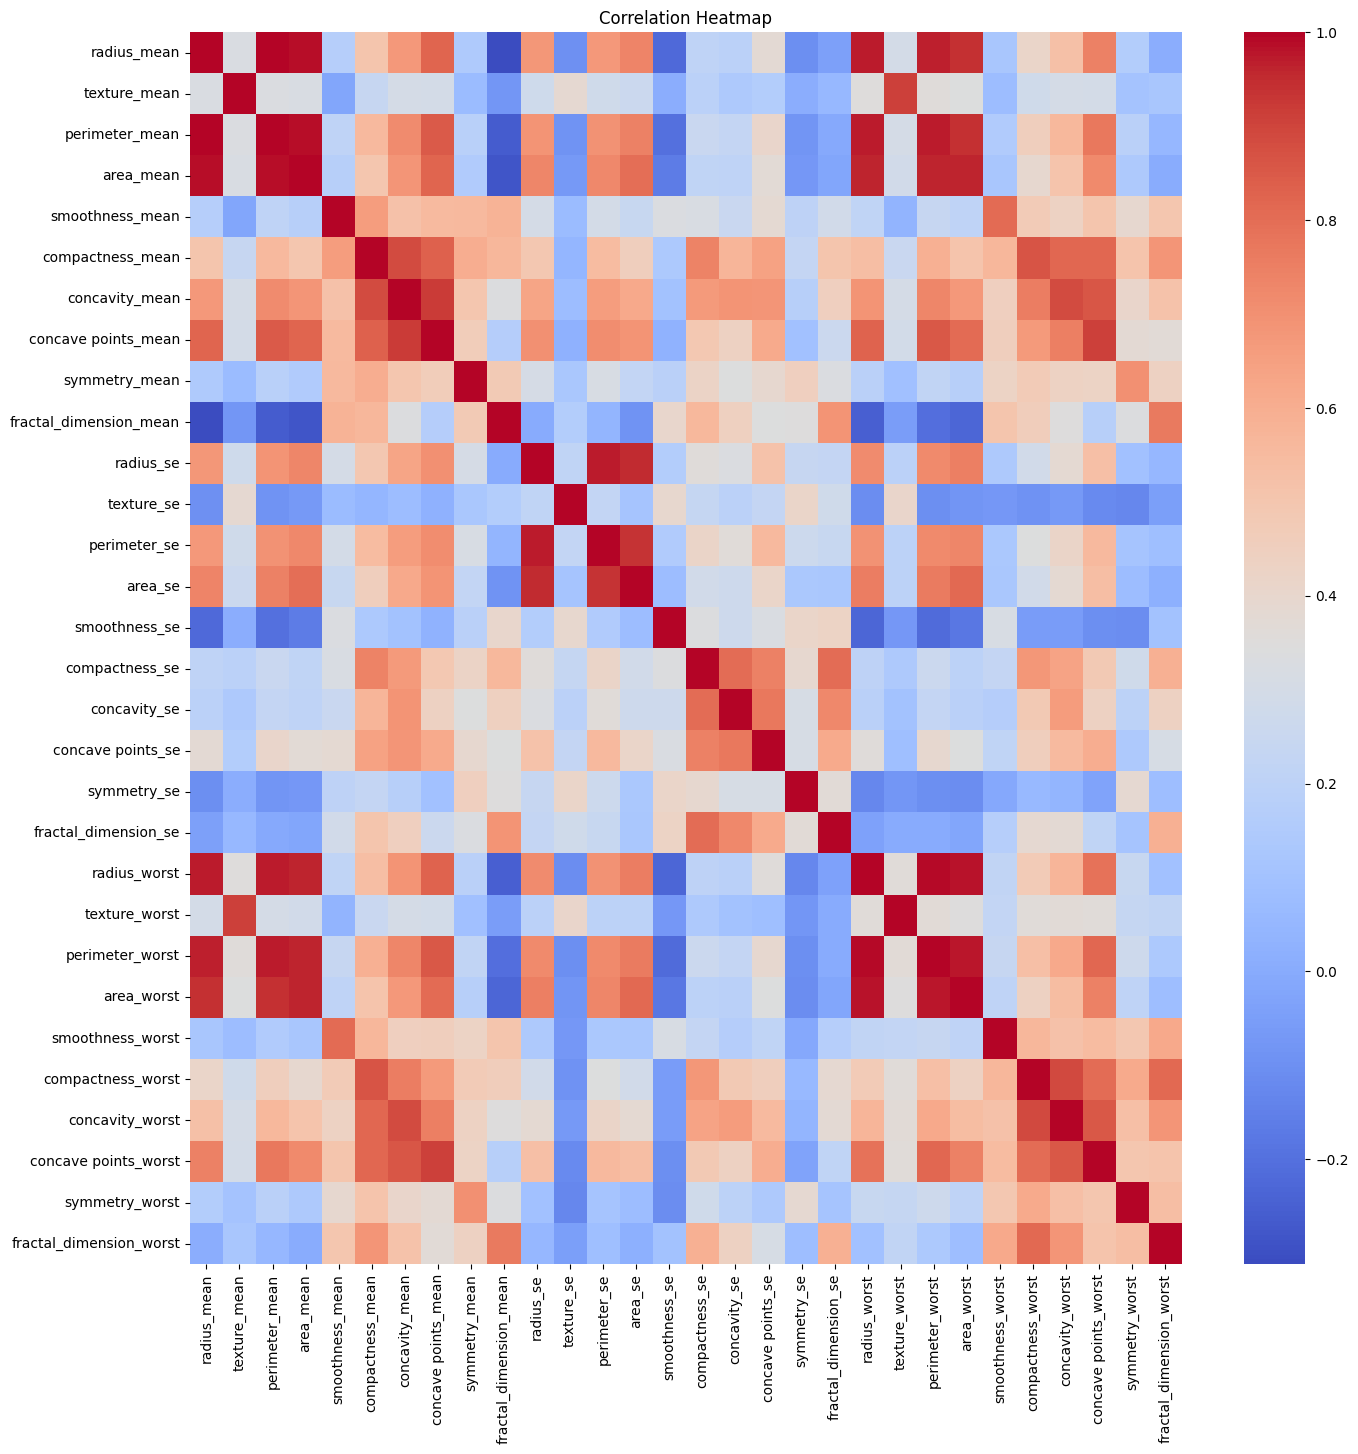

10
{'area_se', 'perimeter_mean', 'texture_worst', 'concave points_mean', 'concave points_worst', 'perimeter_worst', 'area_mean', 'area_worst', 'radius_worst', 'perimeter_se'}


In [ ]:
#breat-cancer.csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Breast_cancer_dataset.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
if 'id' in df.columns:
    df = df.drop(columns=['id'])
if 'diagnosis' in df.columns:
    df = df.drop(columns=['diagnosis'])

x_train = df.select_dtypes(include=['float64', 'int64'])

corrmat = x_train.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corrmat, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(x_train, 0.9)
correlated_features = set(corr_features)

print(len(correlated_features))
print(correlated_features)


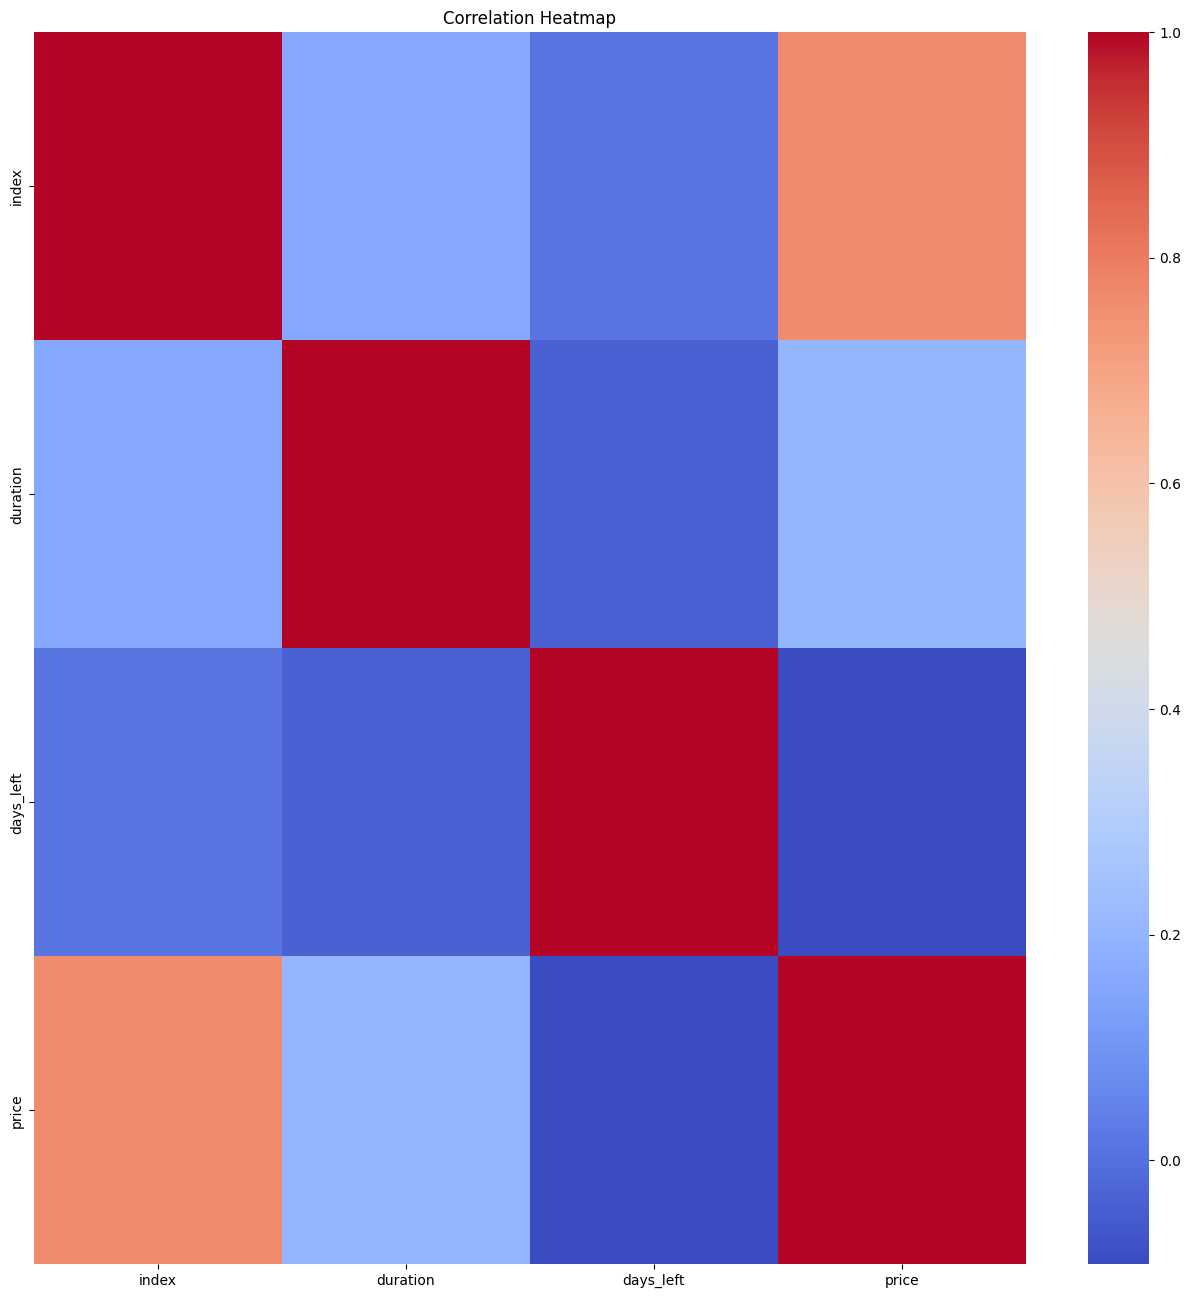

0
set()


In [ ]:
#airlines
#breat-cancer.csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('airlines_flights_data.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
if 'id' in df.columns:
    df = df.drop(columns=['id'])
if 'diagnosis' in df.columns:
    df = df.drop(columns=['diagnosis'])

x_train = df.select_dtypes(include=['float64', 'int64'])

corrmat = x_train.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corrmat, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(x_train, 0.9)
correlated_features = set(corr_features)

print(len(correlated_features))
print(correlated_features)

In [ ]:
# airlines
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('/content/airlines_flights_data.csv')
print("Dataset shape:", df.shape)

# Drop unnecessary column
if 'Unnamed: 32' in df.columns:
    df.drop('Unnamed: 32', axis=1, inplace=True)

# Check for null values
null_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
print("Null values in the dataset:", null_columns)

# Drop ID-like columns
if 'index' in df.columns:
    df.drop('index', axis=1, inplace=True)

# Set target column
target_column = 'price'  # since we're predicting flight price

# Split into features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

# For this to work, we need to encode categorical variables
# Let's use one-hot encoding for simplicity
X = pd.get_dummies(X, drop_first=True)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Identify constant features
constant_features = [feature for feature in x_train.select_dtypes(include=[np.number]).columns
                     if x_train[feature].std() == 0]
print("There are", len(constant_features), "constant features:")

# Identify quasi-constant features (>99.9% same value)
quasi_const_feat = []
for feature in x_train.columns:
    value_counts = x_train[feature].value_counts()
    if len(value_counts) == 0:
        continue
    predominant = (value_counts / float(len(x_train))).sort_values(ascending=False).values[0]
    if predominant > 0.999:
        quasi_const_feat.append(feature)
print("There are", len(quasi_const_feat), "quasi-constant features:")

# Identify duplicated features
duplicated = []
for i in range(len(x_train.columns)):
    col_1 = x_train.columns[i]
    for col_2 in x_train.columns[i + 1:]:
        if x_train[col_1].equals(x_train[col_2]):
            duplicated.append(col_2)

duplicated_features = set(duplicated)
print("There are", len(duplicated_features), "duplicated features:")

# Drop unwanted features
x_train.drop(labels=quasi_const_feat + list(duplicated_features), axis=1, inplace=True)
x_test.drop(labels=quasi_const_feat + list(duplicated_features), axis=1, inplace=True)

print("Final x_train shape:", x_train.shape)
print("Final x_test shape:", x_test.shape)


Dataset shape: (300153, 12)
Null values in the dataset: []
There are 0 constant features:
There are 1332 quasi-constant features:
There are 10 duplicated features:
Final x_train shape: (210107, 258)
Final x_test shape: (90046, 258)


WEEK - 3

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Machine Learning /ML LAB /Datasets/Santander Customer Satisfaction_train.csv')
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
df.dtypes

,0
ID,int64
var3,int64
var15,int64
imp_ent_var16_ult1,float64
imp_op_var39_comer_ult1,float64
...,...
saldo_medio_var44_hace3,float64
saldo_medio_var44_ult1,float64
saldo_medio_var44_ult3,float64
var38,float64


In [ ]:
df.isnull()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
76016,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
76017,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
76018,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
rs = [col for col in df.columns if df[col].isnull().sum()>0]
rs

[]

In [ ]:
categorical = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical, drop_first=True)
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(labels=['TARGET'],axis=1),df['TARGET'],test_size=0.3,random_state=0)
X_train

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
7526,15083,2,23,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
51929,103706,2,48,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,451931.220000
46677,93351,2,40,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41225.670000
46194,92424,2,83,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
20190,40437,2,79,0.0,535.41,535.41,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153477.690000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,42533,53,46,0.0,1770.48,2669.46,451.74,808.77,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124242.570000
45891,91801,2,29,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34968.270000
42613,85345,9,23,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69090.870000
43567,87270,2,30,60.0,72.48,95.64,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66354.510000


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 22  23  57  58  59  60  81  85  86 132 133 134 135 156 162 163 180 181
 190 193 203 215 221 223 235 239 240 245 249 262 263 304 308 309 316 320
 328 350] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Text(0.5, 1.0, 'Anova')

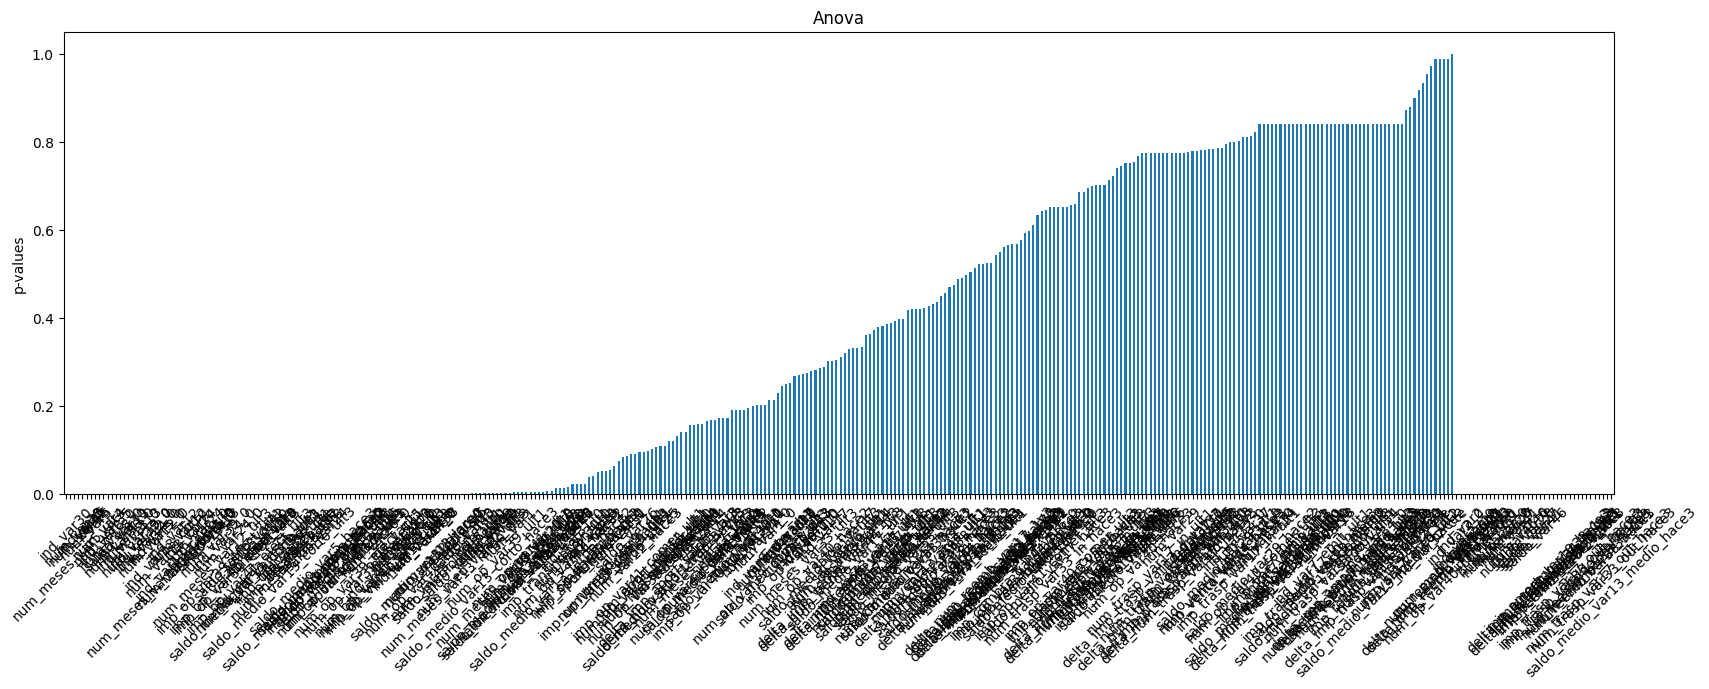

In [ ]:
from sklearn.feature_selection import (
    f_classif,
    SelectFpr,
    SelectKBest,
)
import matplotlib.pyplot as plt
univariate = f_classif(X_train, y_train)
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=True).plot.bar(figsize=(20, 6), rot=45)
plt.ylabel("p-values")
plt.title("Anova")

/tmp/ipython-input-1153435665.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['var3'].fillna(df['var3'].mode()[0], inplace=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:262: UserWarning: Feature 21 is constant and will be replaced with 0.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:262: UserWarning: Feature 22 is constant and will be replaced with 0.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessi

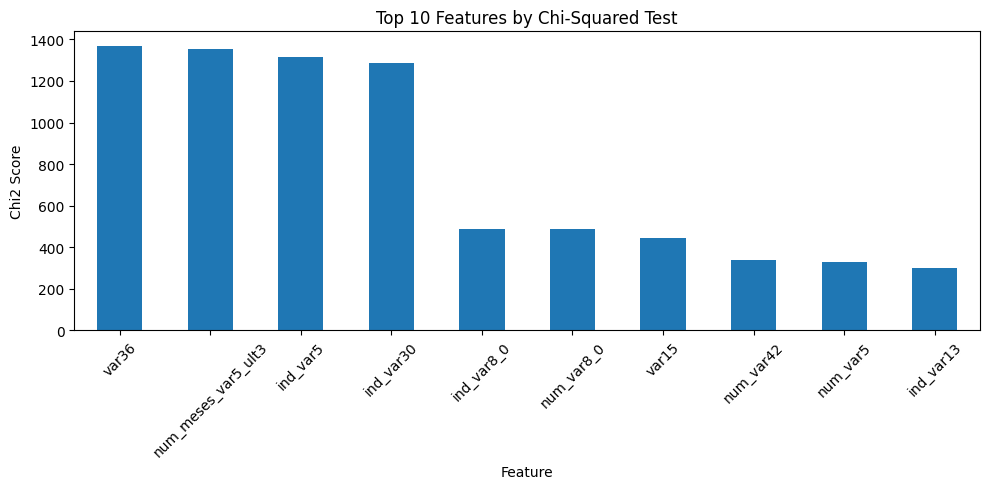

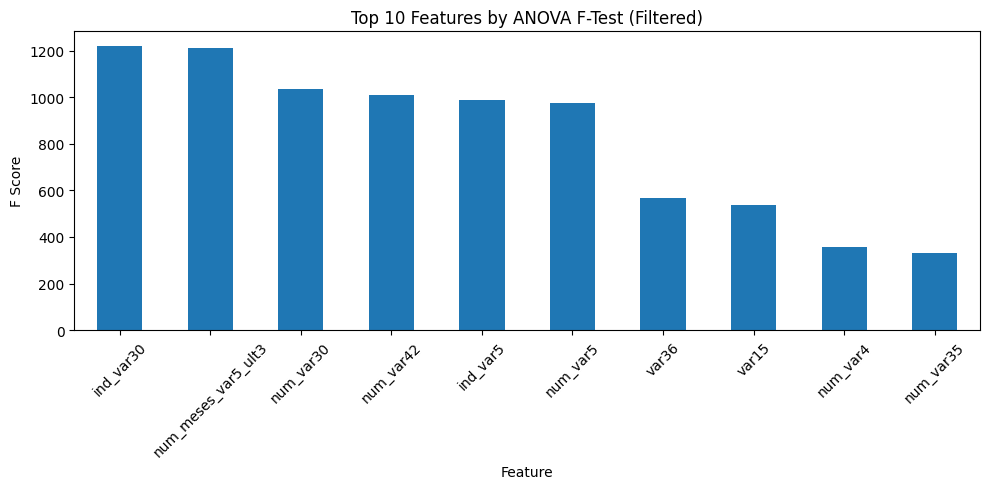

In [ ]:
from sklearn.feature_selection import chi2, f_classif, SelectKBest
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.0)
X_var = selector.fit_transform(x_train)

df = pd.read_csv('/content/drive/MyDrive/Machine Learning /ML LAB /Datasets/Santander Customer Satisfaction_train.csv')

df['var3'] = df['var3'].replace(-999999, np.nan)
df['var3'].fillna(df['var3'].mode()[0], inplace=True)

if 'ID' in df.columns:
    df.drop('ID', axis=1, inplace=True)



X = df.drop('TARGET', axis=1)
y = df['TARGET']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x_train)
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_binned = kbins.fit_transform(X_scaled)
X_binned[~np.isfinite(X_binned)] = 0


chi2_selector = SelectKBest(score_func=chi2, k='all')

if (X_binned < 0).any():
    print("Warning: Binned data contains negative values, which is not suitable for chi2 test.")


chi2_selector.fit(X_binned, y_train)
chi2_scores = pd.Series(chi2_selector.scores_, index=x_train.columns).sort_values(ascending=False)


from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0)
X_train_filtered = selector.fit_transform(x_train)

filtered_features = x_train.columns[selector.get_support()]


anova_selector = SelectKBest(score_func=f_classif, k='all')

anova_selector.fit(X_train_filtered, y_train)


anova_scores_filtered = pd.Series(anova_selector.scores_, index=filtered_features).sort_values(ascending=False)


plt.figure(figsize=(10, 5))
chi2_scores.head(10).plot(kind='bar')
plt.title('Top 10 Features by Chi-Squared Test')
plt.ylabel('Chi2 Score')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
anova_scores_filtered.head(10).plot(kind='bar')
plt.title('Top 10 Features by ANOVA F-Test (Filtered)')
plt.ylabel('F Score')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
variables = ['pclass', 'survived', 'sex', 'sibsp', 'parch', 'embarked']
data = pd.read_csv('/content/drive/MyDrive/Machine Learning /ML LAB /Datasets/titanic_train.csv' )
data.dropna(subset=['Embarked'], inplace=True)
data.head()
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("Survived", axis=1),
    data['urvived'],
    test_size=0.3,
    random_state=0,
)
c = pd.crosstab(y_train, X_train['sex'])

KeyError: 'sex'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import (
    f_classif,
    SelectFpr,
    SelectKBest,
    f_regression
)
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/drive/MyDrive/Machine Learning /ML LAB /Datasets/titanic_train.csv')
df.head()
X_train,X_test,y_train,y_test = train_test_split(df.drop(labels=['Survived'],axis=1),df['Survived'],test_size=0.3,random_state=0)
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
857,858,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
52,53,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
386,387,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S
124,125,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
578,579,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
835,836,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C
192,193,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S
629,630,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q
559,560,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S


In [ ]:
rs = [col for col in df.columns if df[col].isnull().sum()>0]
rs

['Age', 'Cabin', 'Embarked']

In [ ]:
categorical = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical, drop_first=True)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,False,False,...,False,False,False,False,False,False,False,False,False,True


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [   6    7   11   16   17   29   31   36   42   46   49   53   54   56
   57   65   66   68   72   75   79   86   89   90   93  101  103  108
  111  113  114  119  123  129  134  137  138  148  151  162  164  167
  170  174  182  184  186  194  195  196  197  206  210  212  215  224
  225  227  236  237  241  246  252  253  256  264  271  272  273  277
  280  283  288  291  304  305  307  310  312  313  318  319  322  323
  326  330  335  338  340  341  343  344  345  348  349  351  352  353
  356  357  360  361  364  368  374  375  387  402  407  408  409  412
  413  416  421  422  427  436  438  439  441  442  448  451  452  453
  454  455  464  466  472  474  475  476  491  494  495  498  508  511
  512  517  522  524  526  528  531  534  537  538  539  544  545  546
  547  550  554  557  558  559  564  566  567  572  575  579  583  586
  590  591  593  601  612  616

Text(0.5, 1.0, 'Anova')

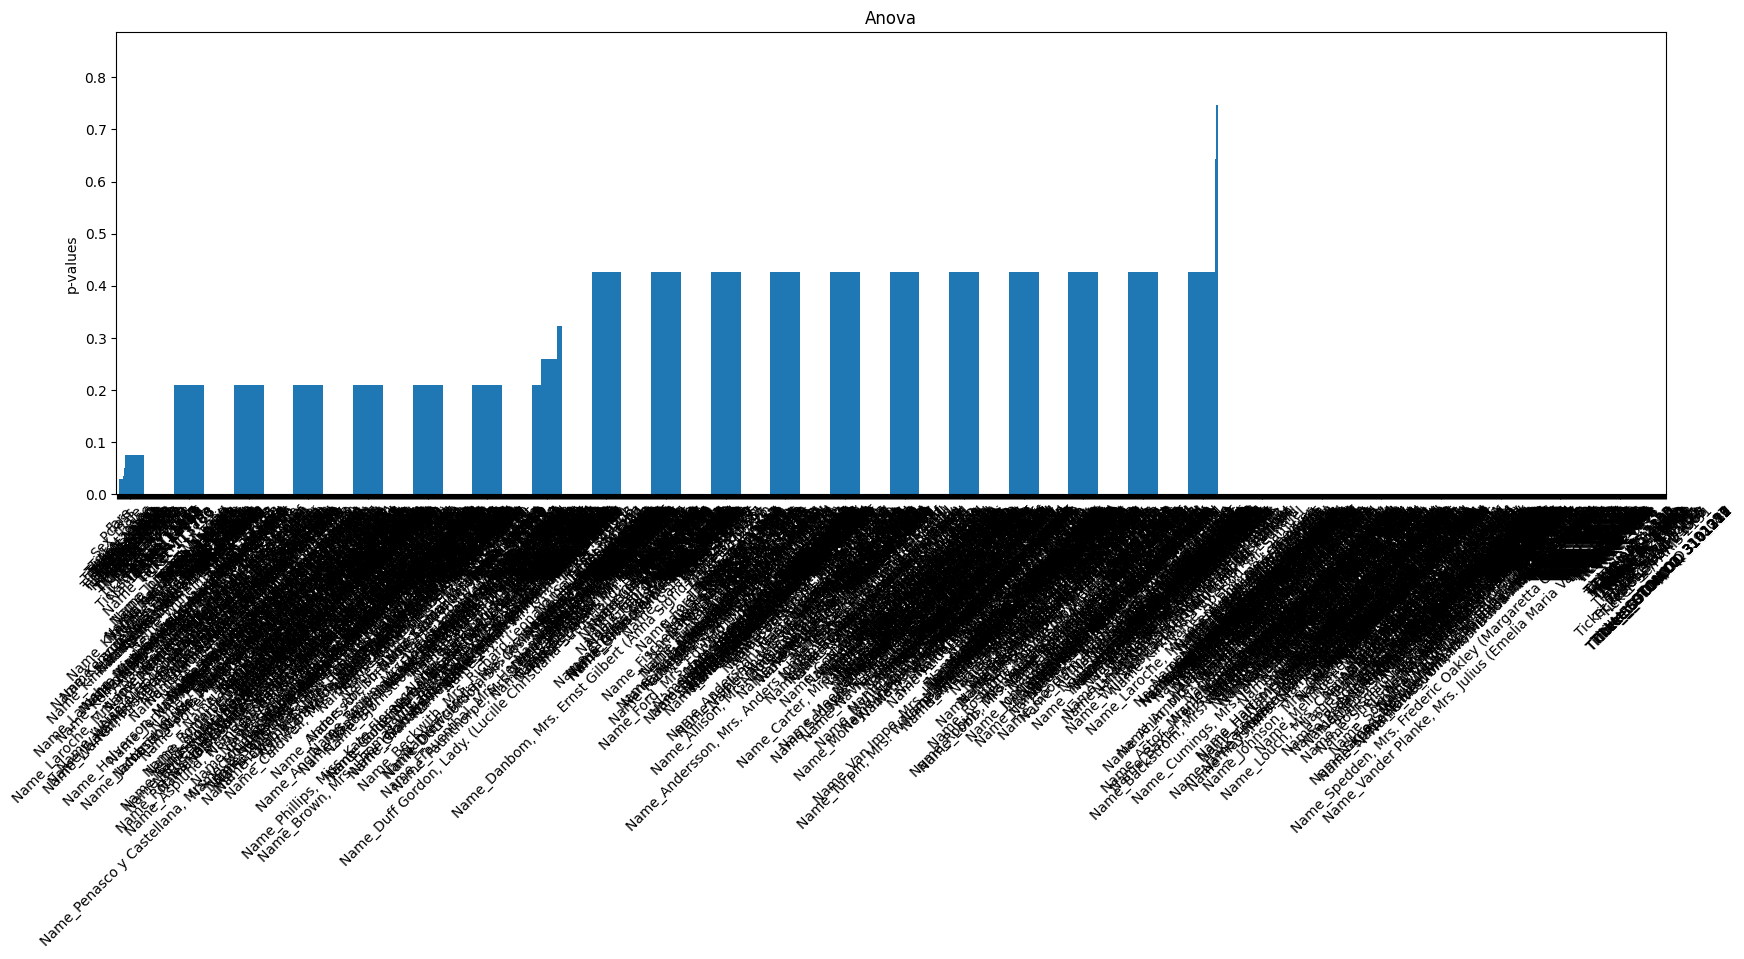

In [ ]:
from sklearn.feature_selection import (
    f_classif,
    SelectFpr,
    SelectKBest,
)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Machine Learning /ML LAB /Datasets/titanic_train.csv')
df = df.drop(columns=['Age', 'Embarked', 'Cabin'])
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
univariate = f_classif(X_train, y_train)
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=True).plot.bar(figsize=(20, 6), rot=45)
plt.ylabel("p-values")
plt.title("Anova")

WEEK - 4

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Machine Learning /ML LAB /Datasets/titanic_train.csv")

# Drop columns not useful for modeling (you can adjust as needed)
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')

# Handle categorical variables
df = pd.get_dummies(df, drop_first=True)

# Fill missing values
df = df.fillna(df.mean())

# Define features and target
X = df.drop('Survived', axis=1)
y = df['Survived']
feature_names = X.columns

# Model
model = LogisticRegression(max_iter=1000)

# Store results
results = []

# Forward Selection
forward_sel = SFS(model, k_features=5, forward=True, floating=False, scoring='accuracy', cv=5)
forward_sel.fit(X, y)
acc_forward = cross_val_score(model, X[list(forward_sel.k_feature_names_)], y, cv=5).mean()
results.append(["Forward Selection", list(forward_sel.k_feature_names_), acc_forward])

# Backward Elimination
backward_sel = SFS(model, k_features=5, forward=False, floating=False, scoring='accuracy', cv=5)
backward_sel.fit(X, y)
acc_backward = cross_val_score(model, X[list(backward_sel.k_feature_names_)], y, cv=5).mean()
results.append(["Backward Elimination", list(backward_sel.k_feature_names_), acc_backward])

# Recursive Feature Elimination (RFE)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)
rfe_features = list(feature_names[rfe.support_])
acc_rfe = cross_val_score(model, X[rfe_features], y, cv=5).mean()
results.append(["RFE", rfe_features, acc_rfe])

# Exhaustive Feature Selection
efs = EFS(model, min_features=5, max_features=5, scoring='accuracy', cv=5)
efs.fit(X, y)
acc_efs = cross_val_score(model, X[list(efs.best_feature_names_)], y, cv=5).mean()
results.append(["Exhaustive Search", list(efs.best_feature_names_), acc_efs])

results_df = pd.DataFrame(results, columns=["Method", "Selected Features", "Accuracy"])
print(results_df)

Features: 126/126

                 Method                                  Selected Features  \
0     Forward Selection  [PassengerId, Pclass, SibSp, Sex_male, Embarke...   
1  Backward Elimination         [Pclass, Age, SibSp, Sex_male, Embarked_S]   
2                   RFE       [Pclass, SibSp, Parch, Sex_male, Embarked_S]   
3     Exhaustive Search  [PassengerId, Pclass, SibSp, Sex_male, Embarke...   

   Accuracy  
0  0.801324  
1  0.795738  
2  0.790132  
3  0.801324  


In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/drive/MyDrive/Machine Learning /ML LAB /Datasets/titanic_train.csv")

df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')
df = pd.get_dummies(df, drop_first=True)
df = df.fillna(df.mean())
X = df.drop('Survived', axis=1)
y = df['Survived']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----- Lasso (L1) -----
lasso = LogisticRegression(penalty='l1', solver='liblinear', C=1, max_iter=1000)
lasso.fit(X_scaled, y)

lasso_coef = pd.Series(lasso.coef_[0], index=X.columns)
selected_lasso = lasso_coef[lasso_coef != 0].index.tolist()

lasso_acc = cross_val_score(lasso, X_scaled, y, cv=5).mean()

# ----- Ridge (L2) -----
ridge = LogisticRegression(penalty='l2', solver='liblinear', C=1, max_iter=1000)
ridge.fit(X_scaled, y)

ridge_coef = pd.Series(ridge.coef_[0], index=X.columns)
selected_ridge = ridge_coef[abs(ridge_coef) > 0.01].index.tolist()  # small threshold to remove weak features
ridge_acc = cross_val_score(ridge, X_scaled, y, cv=5).mean()

print("Lasso Selected Features:", selected_lasso)
print("Lasso Accuracy:", round(lasso_acc, 3))
print("\nRidge Selected Features:", selected_ridge)
print("Ridge Accuracy:", round(ridge_acc, 3))


Lasso Selected Features: ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_S']
Lasso Accuracy: 0.781

Ridge Selected Features: ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
Ridge Accuracy: 0.782


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
df = pd.read_csv("/content/drive/MyDrive/Machine Learning /ML LAB /Datasets/titanic_train.csv")

# Drop columns not useful for modeling
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Fill missing values
df = df.fillna(df.mean())

# Features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Standardize before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA - keep enough components to explain 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Original number of features:", X.shape[1])
print("Reduced number of components:", X_pca.shape[1])

# Train logistic regression on PCA components
model = LogisticRegression(max_iter=1000)
accuracy = cross_val_score(model, X_pca, y, cv=5).mean()

print("Accuracy with PCA:", accuracy)
print("Explained variance ratio:", pca.explained_variance_ratio_)


Original number of features: 9
Reduced number of components: 8
Accuracy with PCA: 0.795744146632352
Explained variance ratio: [0.20426896 0.19029382 0.1722054  0.11031571 0.09304988 0.08256869
 0.06166901 0.04609765]
